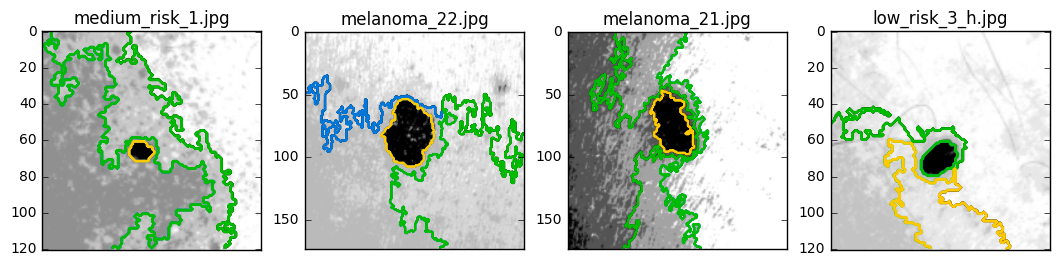

In [24]:
import os
from time import time

import numpy as np
import scipy
from scipy import misc

from skimage import io, filters
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin
#from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.feature_extraction import image

%matplotlib inline
import matplotlib.pyplot as plt

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

n_imgs = 4
fig, axs = plt.subplots(1, n_imgs, figsize=(13,6))
i = 0
for f in os.listdir("../Data/images/")[:n_imgs]:
    
    mole_img = np.array(io.imread("../Data/images/" + f),
                  dtype=np.float64)
    mole_img = np.array(mole_img, dtype=np.float64) / 255
    
    n_clusters = 4

    w, h, d = original_shape = tuple(mole_img.shape)
    assert d == 3
    image_array = np.reshape(mole_img, (w * h, d))

    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    
    mole_img = scipy.misc.imresize(recreate_image(kmeans.cluster_centers_, labels, w, h)[:,:,0], 0.3)
    X = np.reshape(mole_img, (-1,1))
    graph = image.grid_to_graph(*mole_img.shape)
    N_REGIONS = 4

    ward = AgglomerativeClustering(n_clusters=N_REGIONS, 
                                     connectivity=graph,
                                     linkage="ward")
    ward.fit(X)
    labels = ward.labels_.reshape(mole_img.shape)

    axs[i].set_xticks(())
    axs[i].set_xticks(())
    axs[i].set_title(f)
    axs[i].imshow(mole_img, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        axs[i].contour(labels == l, 
                       contours=1, 
                       colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    
    i += 1
